In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

df = pd.read_csv('ensonhali.csv')
df.drop(["sentiment","subjectivity","polarity"], axis = 1, inplace = True) 
df = df[pd.notnull(df['kategori'])]
print(df.head(10))
print(df['temiz_haber'].apply(lambda x: len(x.split(' '))).sum())

     kategori                                        temiz_haber
0  arts  life  even death artist even death artist from paris...
1       world  reopens travellers reopens travellers gondolas...
2  arts  life  alamy photoalamy photorestoration works ongoin...
3     economy  consumer prices consumer prices mays annual a ...
4     economy  btc oil btc oil the oil delivered  kilometerlo...
5     economy  the development investment bank the developmen...
6       world  britains foreign minister said spoken five eye...
7     economy  thy set resume flights  cities six european co...
8       world  a storm arabian sea a storm arabian sea nisarg...
9      sports  the turkish the turkish nearly  competitors to...
2276316


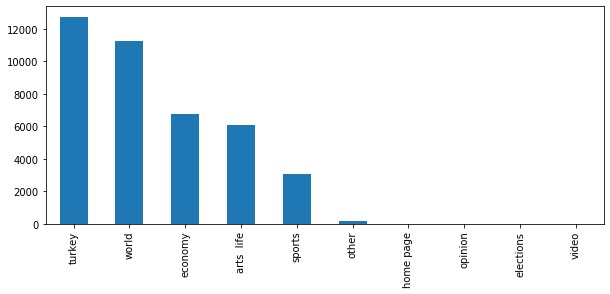

In [2]:
my_tags = ['economy','turkey','world','sports','arts  life','other','home page']
plt.figure(figsize=(10,4))
df.kategori.value_counts().plot(kind='bar');

In [3]:
def print_plot(index):
    example = df[df.index == index][['temiz_haber', 'kategori']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Kategori:', example[1])

print_plot(10)

june  evacuated expatriate family one members infected june  evacuated expatriate family one members infected a turkish air ambulance carrying couple three children left cairo international airport arrived çorlu atatürk airport northwestern turkeykader biçer mother contracting coronavirus husband veli biçer symptoms disease children ensar ebrar erva referred local hospital arrivalhasan biçer velis brother told reporters happy biçer family back homebrother biçer said family treated egypt my brother wife stayed home without medication treatment so apply return homehe thanked president recep tayyip erdoğan officials made possible family come back turkeyturkish authorities took action bring biçer family turkey children called help video shared youtube
Kategori: turkey


In [4]:
print_plot(30)

from canceled iftar feasts suspended mosque prayers muslims across middle east bracing bleak month from canceled iftar feasts suspended mosque prayers muslims across middle east bracing bleak month ramadan period selfreflection socializing believers fast dawn dusk gather around family community meal evening islams holiest month begins later week ends eid alfitr festivitiesbut year fastspreading novel more dispiriting many devout muslims congregational worship including taraweeh night prayers prohibited mosques across region many closed bid slow spread virusseveral countries religious authorities including saudi arabias grand mufti abdulaziz alsheikh ruled prayers ramadan eid performed homeour hearts crying said ali mulla muezzin grand mosque meccawe used seeing holy mosque crowded people day night time i feel pain deep insidein recent weeks stunning emptiness enveloped sacred kaaba large black cube structure draped goldembroidered cloth grand mosque towards muslims around world praythe

In [5]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['temiz_haber'] = df['temiz_haber'].apply(clean_text)
print_plot(10)

june evacuated expatriate family one members infected june evacuated expatriate family one members infected turkish air ambulance carrying couple three children left cairo international airport arrived orlu atatrk airport northwestern turkeykader bier mother contracting coronavirus husband veli bier symptoms disease children ensar ebrar erva referred local hospital arrivalhasan bier velis brother told reporters happy bier family back homebrother bier said family treated egypt brother wife stayed home without medication treatment apply return homehe thanked president recep tayyip erdoan officials made possible family come back turkeyturkish authorities took action bring bier family turkey children called help video shared youtube
Kategori: turkey


In [6]:
df['temiz_haber'].apply(lambda x: len(x.split(' '))).sum()

2094690

In [7]:
X = df.temiz_haber
y = df.kategori
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.6994767007226513
              precision    recall  f1-score   support

     economy       0.95      0.47      0.63      1258
      turkey       0.93      0.42      0.58      1288
       world       0.00      0.00      0.00         1
      sports       0.00      0.00      0.00        28
  arts  life       0.96      0.53      0.68       605
       other       0.63      0.89      0.74      2586
   home page       0.66      0.82      0.73      2260

    accuracy                           0.70      8026
   macro avg       0.59      0.45      0.48      8026
weighted avg       0.76      0.70      0.69      8026



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

bn = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', BernoulliNB()),
              ])

bn.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = bn.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.6750560677797159
              precision    recall  f1-score   support

     economy       0.86      0.37      0.52      1258
      turkey       0.87      0.41      0.56      1288
       world       0.00      0.00      0.00         1
      sports       0.00      0.00      0.00        28
  arts  life       0.97      0.44      0.61       605
       other       0.66      0.84      0.74      2586
   home page       0.60      0.87      0.71      2260

    accuracy                           0.68      8026
   macro avg       0.57      0.42      0.45      8026
weighted avg       0.73      0.68      0.66      8026



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.72651383005233
              precision    recall  f1-score   support

     economy       0.80      0.61      0.69      1258
      turkey       0.71      0.54      0.61      1288
       world       0.00      0.00      0.00         1
      sports       0.00      0.00      0.00        28
  arts  life       0.90      0.74      0.82       605
       other       0.71      0.83      0.77      2586
   home page       0.69      0.78      0.73      2260

    accuracy                           0.73      8026
   macro avg       0.54      0.50      0.52      8026
weighted avg       0.73      0.73      0.72      8026



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy 0.7780961873909793
              precision    recall  f1-score   support

     economy       0.83      0.73      0.78      1258
      turkey       0.83      0.63      0.72      1288
       world       0.00      0.00      0.00         1
      sports       0.40      0.07      0.12        28
  arts  life       0.90      0.84      0.87       605
       other       0.76      0.83      0.80      2586
   home page       0.72      0.82      0.77      2260

    accuracy                           0.78      8026
   macro avg       0.64      0.56      0.58      8026
weighted avg       0.78      0.78      0.78      8026



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

train_size = int(len(df) * .7)
train_posts = df['temiz_haber'][:train_size]
train_tags = df['kategori'][:train_size]

test_posts = df['temiz_haber'][train_size:]
test_tags = df['kategori'][train_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 32
epochs = 40

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Train on 22470 samples, validate on 5618 samples
Epoch 1/40
22470/22470 [==============================] - 5s 236us/step - loss: 0.9666 - accuracy: 0.6737 - val_loss: 0.8280 - val_accuracy: 0.7131
Epoch 2/40
22470/22470 [==============================] - 5s 222us/step - loss: 0.7532 - accuracy: 0.7378 - val_loss: 0.8063 - val_accuracy: 0.7186
Epoch 3/40
22470/22470 [==============================] - 5s 213us/step - loss: 0.6867 - accuracy: 0.7587 - val_loss: 0.7830 - val_accuracy: 0.7300
Epoch 4/40
22470/22470 [==============================] - 5s 232us/step - loss: 0.6301 - accuracy: 0.7779 - val_loss: 0.7911 - val_accuracy: 0.7300
Epoch 5/40
22470/22470 [==============================] - 5s 222us/step - loss: 0.5862 - accuracy: 0.7947 - val_loss: 0.8053 - val_accuracy: 0.7318
Epoch 6/40
22470/22470 [==============================] - 5s 224us/step - loss: 0.5440 - accuracy: 0.8070 - val_loss: 0.8097 - val_accuracy: 0.7369
Epoch 7/40
22470/22470 [==============================] - 6s 26

In [21]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

12038/12038 [==============================] - 0s 35us/step
Test accuracy: 0.760425329208374
